In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 暴击率函数

基于喝茶瞬移者的计算公式
https://tieba.baidu.com/p/3810346686?see_lz=1

In [37]:
def cal_crit_chance_dex_1(dex):
    dex_effective = np.min([dex, 484])
    crit_chance = 0.1 + 0.0002 * dex_effective * (1001-dex_effective)
    crit_change = np.min([0.501, crit_chance])
    return crit_chance

基于不火的名字的计算公式   
https://tieba.baidu.com/p/7352783459?pid=139760810043&cid=0#139760810043

In [38]:
def cal_crit_chance_dex_2(dex):
    dex_effective = np.min([dex, 484])
    crit_chance = (-0.000200001 * dex**2 + 0.200201 * dex -0.000270408)/ 100
    crit_change = np.min([0.501, crit_chance])
    return crit_chance

两种计算方法对比

In [39]:
dex_list = np.arange(1, 500)
crit_chance_list1 = []
crit_chance_list2 = []
for dex in dex_list:
    crit_chance = cal_crit_chance_dex_1(dex)
    crit_chance_list1.append(crit_chance)
    crit_chance = cal_crit_chance_dex_2(dex)
    crit_chance_list2.append(crit_chance)

由图可见结果一致

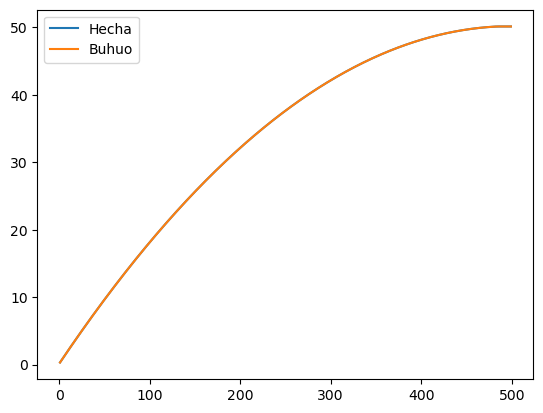

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(dex_list, crit_chance_list1, label="Hecha")
ax.plot(dex_list, crit_chance_list1, label="Buhuo")

ax.legend()

## 固伤增幅计算

In [60]:
num_skull_focus = 2
dex_equipment = 120
foc_equipment = 42 * 2 + 68

In [61]:
dmg_max = 0

for num_skull_critchance in range(0, 8+1):
    num_skull_critdamage = 8 - num_skull_critchance
    for dex_lvlup in range(495+1):
        foc_lvlup = 495 - dex_lvlup
        dex = 10 + dex_lvlup + dex_equipment
        foc = 15 + foc_lvlup + foc_equipment + num_skull_focus * 62
        crit_chance_equip = num_skull_critchance * 0.1 + 0.06 + 0.08*2
        crit_chance_dex = cal_crit_chance_dex_1(dex)/100
        crit_chance = crit_chance_dex + crit_chance_equip
        crit_chance = np.min([1, crit_chance])
        dmg_crit_amp = 1 + 0.5 + num_skull_critdamage*0.6 + 0.2 
        dmg_base_amp = 1 + foc * 0.005 + 0.15*2
        dmg = ((1-crit_chance) * 1 + crit_chance * dmg_crit_amp) * dmg_base_amp
        if dmg > dmg_max:
            dmg_max = dmg
            dex_optimal = dex
            dex_lvlup_optimal = dex_lvlup
            foc_lvlup_optimal = foc_lvlup
            num_skull_critchance_optimal = num_skull_critchance
            num_skull_critdamage_optimal = num_skull_critdamage
            crit_chance_optimal = crit_chance
            
print("dmg_max", dmg_max)
print("dex_optimal", dex_optimal)
print("dex_lvlup_optimal", dex_lvlup_optimal)
print("foc_lvlup_optimal", foc_lvlup_optimal)
print("num_skull_critchance_optimal", num_skull_critchance_optimal)
print("crit_chance_optimal", crit_chance_optimal)

dmg_max 20.506564756
dex_optimal 233
dex_lvlup_optimal 103
foc_lvlup_optimal 392
num_skull_critchance_optimal 2
crit_chance_optimal 0.778888
